In [1]:
# Import the necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import numpy as np

In [2]:
# Read the data file
# NOTE: This assumes the data file is in the same folder as this script
df = pd.read_csv('Single-Family_ResidentialWaterUseDataSample.csv', header=12, sep=',',
                 index_col=0, parse_dates=True, infer_datetime_format=True, low_memory=False)

print ('There are ' + str(len(df)) + ' data points in the data frame.')
print ('The begin date is ' + str(df.index.min()))
print ('The end date is ' + str(df.index.max()))
print ('\nColumn headers and first few rows of data:\n')
print (df.head(3))

There are 1641706 data points in the data frame.
The begin date is 2018-06-04 14:14:39
The end date is 2018-08-27 10:58:00

Column headers and first few rows of data:

                     Pulse_Count
DateTimeMST                     
2018-06-04 14:14:39            0
2018-06-04 14:14:43            0
2018-06-04 14:14:47            0


In [6]:
V_pulse     = 0.0087 #gallons
Delta_time  = 4.9    #seconds
df['Q_gpm'] = df['Pulse_Count']*V_pulse/Delta_time*60 #gpm
print (df.head(3))

print('\nNumber of All Readings is     ' + str(len(df)))
print('Number of NonZero Readings is ' + str(np.count_nonzero(df['Q_gpm']!=0)))
print('Number of Zero Readings is    ' + str(np.count_nonzero(df['Q_gpm']==0)))

#max_highfreq = round(max(df['Q_gpm']),3)
#print('\nMax High Freq Flow is    ' + str(max_highfreq) + ' gpm')

max_value = max(df['Q_gpm'])
max_date = df.index[df['Q_gpm']==max_value]
print ("\nMaximum Flow is "+ str(round(max_value,3)) 
       + ' gpm at time step ' +  str(max_date[0]))

min_value = round(min(df['Q_gpm']),3)
print('Minimum Flow is  ' + str(min_value) + ' gpm')

mean_value = np.mean(df['Q_gpm'])
print ("Mean Flow is     "+ str(round(mean_value,2))+ ' gpm')

                     Pulse_Count  Q_gpm
DateTimeMST                            
2018-06-04 14:14:39            0    0.0
2018-06-04 14:14:43            0    0.0
2018-06-04 14:14:47            0    0.0

Number of All Readings is     1641706
Number of NonZero Readings is 940336
Number of Zero Readings is    701370

Maximum Flow is 39.629 gpm at time step 2018-06-13 07:47:03
Minimum Flow is  0.0 gpm
Mean Flow is     0.77 gpm


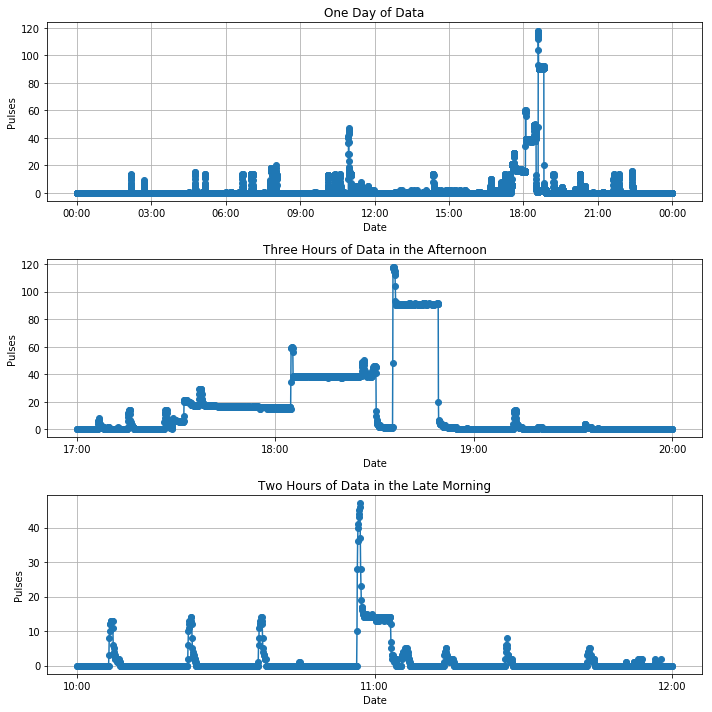

Done


In [3]:
# ---------------------------------------------------------------------
# This script uses Pandas and Matplotlib to generate some simple plots
# of the raw data for the single family residential dataset. It is
# meant to provide a quick visualization so you can get a feel for what
# the raw data look like.
# Author: Jeff Horsburgh
# Last Modified: 2-1-2019
# This script was written for Python 3.7
# ---------------------------------------------------------------------

# Import the necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the data file
# NOTE: This assumes the data file is in the same folder as this script
# Change the path here to where you located the data file on your hard disk.
df = pd.read_csv('Single-Family_ResidentialWaterUseDataSample.csv', header=12, sep=',',
                 index_col=0, parse_dates=True, infer_datetime_format=True, low_memory=False)

# Create the output figure and set its size
fig = plt.figure(figsize=(10, 10))

# Select a day's worth of data
beginDate = '2018-06-05 00:00:00'
endDate = '2018-06-06 00:00:00'
df_sub = df[beginDate:endDate]

# Plot a day of data
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df_sub.index, df_sub['Pulse_Count'], 'o-', label='Pulse Count')

# Set the title, axes labels, legend, etc.
ax1.set_ylabel('Pulses')
ax1.set_xlabel('Date')
ax1.grid(True)
left, right = plt.xlim()
ax1.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=10, interval_multiples=True))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.title('One Day of Data')

# Select and plot a couple of hours of data in the afternoon
beginDate = '2018-06-05 17:00:00'
endDate = '2018-06-05 20:00:00'
df_sub = df[beginDate:endDate]
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df_sub.index, df_sub['Pulse_Count'], 'o-', label='Pulse Count')

# Set the title, axes labels, legend, etc.
ax2.set_ylabel('Pulses')
ax2.set_xlabel('Date')
ax2.grid(True)
ax2.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=10, interval_multiples=True))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.title('Three Hours of Data in the Afternoon')

# Select and plot another two hours of data in the late morning
beginDate = '2018-06-05 10:00:00'
endDate = '2018-06-05 12:00:00'
df_sub = df[beginDate:endDate]
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df_sub.index, df_sub['Pulse_Count'], 'o-', label='PulseCount')

# Set the title, axes labels, legend, etc.
ax3.set_ylabel('Pulses')
ax3.set_xlabel('Date')
ax3.grid(True)
ax3.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=2, maxticks=10, interval_multiples=True))
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.title('Two Hours of Data in the Late Morning')

# Make sure the plot displays
fig.tight_layout()
plt.show()

print('Done')

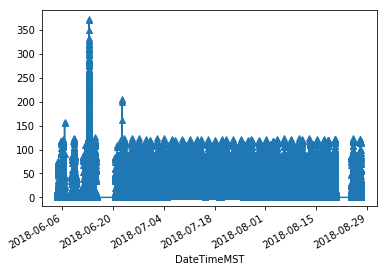

In [10]:
df['Pulse_Count'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')
plt.show()

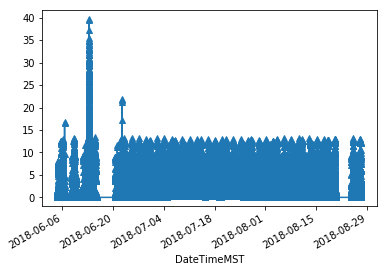

In [36]:
df['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')
plt.show()

In [4]:
#A= len(df)
#print (A)
#B= df.head(5)
#print ("B=", B)
#C= df.describe()
#print ('C',  C)
#D= df.columns
#print ('D',  D)
#E= df.dtypes
#print ('E',  E)
# String concatenation is done with the "+" operator
# \n for adding empty line

# Print the column headers and first few rows of the data frame
#print ('\nColumn headers and first few rows of data:\n')
#print(df.head(5))

## Print a statistical summary for each column of the data frame
#print ('\nStatistical summary for each column:\n')
#print(df.describe())

# Print a list of the column names in the data frame
#print ('\nList of column names in the data frame:\n')
#print (df.columns)

# Print a list of data types for each of the columns in the data frame
#print ('\nData types for each column:\n')
#print(df.dtypes)

#print ('Done!')

In [28]:
#idx = pd.date_range('2018-06-04 14:14:39', '2018-08-27 10:58:00')
#print(idx)
#dfnew = df['Pulse_Count'].reindex(idx, fill_value=0)
#print(dfnew)

#dfnew=df.reindex()

In [10]:
# Aggregate the DataFrame
# It is important to use the coulmn name to make it one column dataframe

# label='right' to put the value at the next time step
#hourlydf = df.resample(rule='1H', label='right').sum()
#print(hourlydf.head(5))

#monthly
#monthly  = df['Q_gpm'].resample(rule='1M', base=0).mean()
#monthlydf = pd.DataFrame(data=monthly, index=monthlydf.index)
#print(monthlydf)


#weekly
#weekly = df['Q_gpm'].resample(rule='1W', base=0).mean()
#weeklydf = pd.DataFrame(data=weekly, index=weeklydf.index)
#print(weeklydf.head(5))

#hourly
#hourlydf = df['Q_gpm'].resample(rule='1H', base=0).mean()
#print(hourlydf.head(5))

# per minute  
#minutedf=df['Q_gpm'].resample('1T', base=0).mean()
#print(minutedf.head(5))

#per 20 seconds
#seconddf=df['Q_gpm'].resample('20S', base=0).mean()
#print(seconddf.head(5))

#print ('Done!')

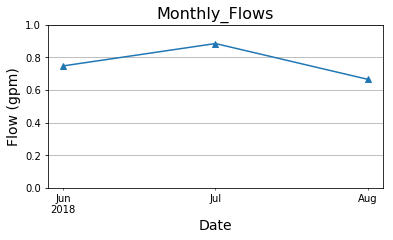

This flow is not appropriate for this small data sample


In [19]:
# Have to be reorganized as weekly

#monthly
monthly = df_sub['Q_gpm'].resample(rule='1M', base=0).mean()
#print(monthly.head)
monthlydf = pd.DataFrame(data=monthly, index=monthly.index)
#print(monthlydf.head)

fig = plt.figure()
fig.set_size_inches(6, 3)

ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,1)

monthlydf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

plt.title('Monthly_Flows', fontsize=16)
plt.savefig('Monthly_Flows')

plt.show()

print ('This flow is not appropriate for this small data sample')

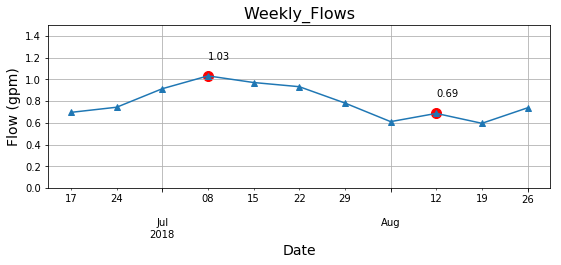


Global Maximum is 1.03 gpm at the end of week 2018-07-08 00:00:00

Local Maximum Table:
DateTimeMST
2018-07-08    1.03
2018-08-12    0.69
Name: Q_gpm, dtype: float64

Done!


In [21]:
# Weekly Analysis 

#Determine the period of the analysis with a defined start and end of a week
beginDate = '2018-06-10 00:00:00'
endDate = '2018-08-26 23:59:59'
df_sub = df[beginDate:endDate]

#Aggregate Dataframe to weekly
weekly = df_sub['Q_gpm'].resample(rule='1W', base=0).mean()

#Convert Series Analysis to Dataframe
weeklydf = pd.DataFrame(data=weekly, index=weekly.index)

#Set Time Step for Each Date
n=(weeklydf.shape[0])
weeklydf['ts'] =  np.arange(1,n+1)

# Plot Weekly Analysis

fig = plt.figure()
fig.set_size_inches(9, 3)

ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,1.5)
ax.set_ylabel('Flow (gpm)', fontsize=14)


weeklydf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Find Global Maximum
max_week_value = max(weekly)
max_week_date = weekly.index[weekly==max_week_value]

# Find and Print local Maiximum
loc_max = weekly[(weekly.shift(1) < weekly) & (weekly.shift(-1) < weekly)]
loc_max = round(loc_max, 2)

# Plot and Anotate Local Maiximum
plt.scatter(loc_max.index, loc_max, c='r', s=100)
for i, txt in enumerate(loc_max):
    ax.annotate(txt, (loc_max.index[i], loc_max[i]), xytext=(loc_max.index[i], loc_max[i]+0.15))

# Plot tilte and Save Image
plt.title('Weekly_Flows', fontsize=16)
plt.savefig('Weekly_Flows')

plt.show()

print ("\nGlobal Maximum is "+ str(round(max_week_value,2)) + ' gpm at the end of week ' +  str(max_week_date[0]))
print ("\nLocal Maximum Table:")
print(loc_max.head(100))

print ('\nDone!')

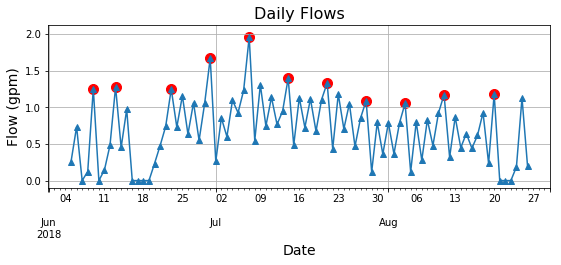

Done!


In [6]:
# Have to be reorganized as weekly

# Daily Analysis

#The begin date is 2018-06-04 14:14:39
#The end date is 2018-08-27 10:58:00

beginDate = '2018-06-05 00:00:00'
endDate = '2018-08-26 23:59:59'
df_sub = df[beginDate:endDate]

# Aggregate data to daily data
dailydf = df_sub['Q_gpm'].resample(rule='24H', base=0).mean()
#print(dailydf.head(15))

max_day = max(dailydf)
ts_max_day = dailydf.index[dailydf==max_day]

# PLOT DAILY FLOWS
dailydf_new=dailydf.fillna(0)
fig = plt.figure()
fig.set_size_inches(9, 3)

ax = fig.add_subplot(1, 1, 1)

dailydf_new.plot(kind='line', use_index=True, style='-', marker='^', label='Max')
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

plt.title('Daily Flows', fontsize=16)
plt.savefig('Daily Flows')

# Find local peaks
Loc_max = dailydf_new[(dailydf_new.shift(2) < dailydf_new) & (dailydf_new.shift(1) < dailydf_new)
                 & (dailydf_new.shift(-1) < dailydf_new) & (dailydf_new.shift(-2) < dailydf_new)]
#print(Loc_max.head(100))
plt.scatter(Loc_max.index, Loc_max, c='r', s=100)

plt.show()
print ('Done!')

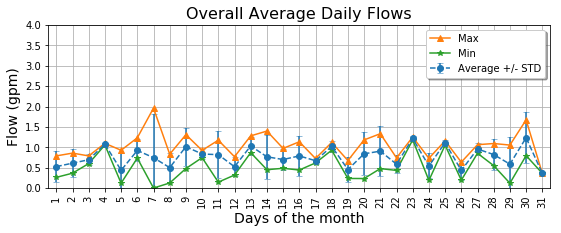

Done!


In [7]:
# Have to be reorganized as weekly

# Daily Analysis 2

# Do statistical grouping over the whole period
dailyAvg = dailydf.groupby(dailydf.index.day).mean()
#print(dailyAvg.head(5))
dailyMax = dailydf.groupby(dailydf.index.day).max()
#print(dailyMax.head(5))
dailyMin = dailydf.groupby(dailydf.index.day).min()
#print(dailyMin.head(5))
dailySTD = dailydf.groupby(dailydf.index.day).std()
#print(dailySTD.head(5))

# Generate a plot of the data with some indication of the variability in
#the daily average values (e.g., add error bars with +- one Std. Dev.)

fig = plt.figure()
fig.set_size_inches(9, 3)
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,4)

plt.errorbar(x=dailyAvg.index, y=dailyAvg, yerr=dailySTD, capsize=3,
             capthick=0.5, fmt='--', label='Average +/- STD', marker='o')
dailyMax.plot(ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max')
dailyMin.plot(ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min')

# Set the limits on the x-axis and the tick
# mark locations

# Set the x and y-axis labels
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Days of the month', fontsize=14)
plt.xticks(rotation=90)
ax.set_xlim(0.5, 31.5)

xmarks = range(1, 31 + 1, 1)
plt.xticks(xmarks)
ax.grid(True)

# Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)

plt.title('Overall Average Daily Flows', fontsize=16)
plt.savefig('Overall Average Daily Flows')

plt.show()

print ('Done!')

DateTimeMST
2018-06-04 15:00:00    0.024996
2018-06-04 16:00:00    0.121155
2018-06-04 17:00:00    3.018407
2018-06-04 18:00:00    1.721611
2018-06-04 19:00:00    0.057491
Freq: H, Name: Q_gpm, dtype: float64


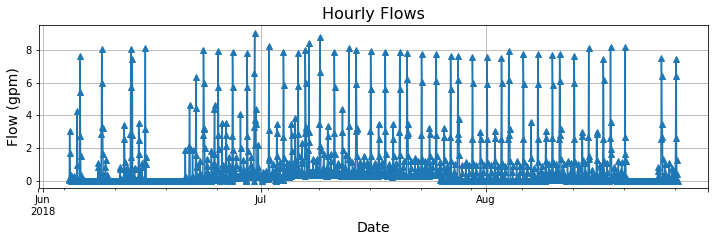

Done!


In [18]:
# Have to be reorganized as weekly
# Hourly Analysis n.1

#The begin date is 2018-06-04 14:14:39
#The end date is 2018-08-27 10:58:00

beginDate = '2018-06-04 15:00:00'
endDate = '2018-08-27 09:59:59'
df_sub = df[beginDate:endDate]


# Aggregate data to hourly data
hourlydf = df_sub['Q_gpm'].resample(rule='1H', base=0).mean()
print(hourlydf.head(5))

max_hour = max(hourlydf)
ts_max_hour = hourlydf.index[hourlydf==max_hour]

# PLOT HOURLY FLOWS

hourlydf_new=hourlydf.fillna(0)

fig = plt.figure()
fig.set_size_inches(12, 3)
ax = fig.add_subplot(1, 1, 1)

hourlydf_new.plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

plt.title('Hourly Flows', fontsize=16)
plt.savefig('Hourly Flows')

plt.show()

print ('Done!')

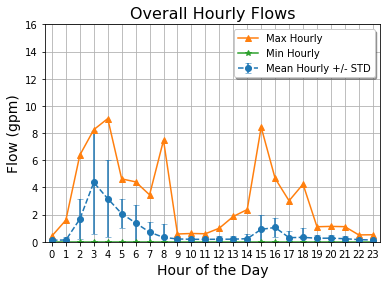

Done!


In [9]:
# Have to be reorganized as weekly
# Hourly Analysis n.2

# Do statistical grouping over the whole period
hourlyAvg = hourlydf.groupby(hourlydf.index.hour).mean()
#print(hourlydfAvg.head(5))
hourlyMax = hourlydf.groupby(hourlydf.index.hour).max()
#print(hourlydfMax.head(5))
hourlyMin = hourlydf.groupby(hourlydf.index.hour).min()
#print(hourlydfMin.head(5))
hourlySTD = hourlydf.groupby(hourlydf.index.hour).std()
#print(hourlySTD.head(5))

# Generate a plot of the data with some indication of the variability in
#the hourly average values (e.g., add error bars with +- one Std. Dev.)

fig = plt.figure()
fig.set_size_inches(6, 4)
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0,16)

plt.errorbar(x=hourlyAvg.index, y=hourlyAvg, yerr=hourlySTD, capsize=3,
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

# Set the limits on the x-axis and the tick
# mark locations
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)

# Set the x and y-axis labels
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Hour of the Day', fontsize=14)
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)
ax.grid(True)

# Add a legend with some customizations
legend = ax.legend(loc='upper right', shadow=True)

plt.title('Overall Hourly Flows', fontsize=16)
plt.savefig('Overall Hourly Flows')

plt.show()

print ('Done!')

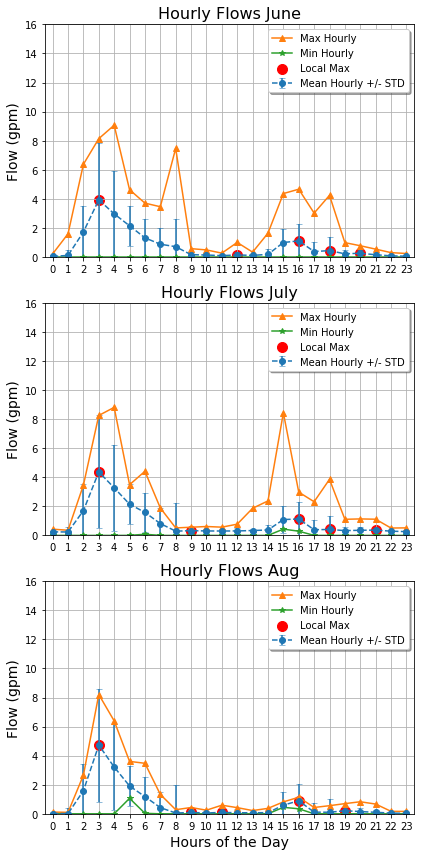

Done!


In [10]:
# Have to be reorganized as weekly
# Hourly Analysis no.3

#The begin date is 2018-06-04 14:14:39
#The end date is 2018-08-27 10:58:00

# Select a day's worth of data
beginDate = '2018-06-04 15:00:00'
endDate   = '2018-06-30 23:59:59'
df_June   = df[beginDate:endDate]
beginDate = '2018-07-01 00:00:00'
endDate   = '2018-07-31 23:59:59'
df_July   = df[beginDate:endDate]
beginDate = '2018-08-01 00:00:00'
endDate   = '2018-08-27 09:59:59'
df_Aug    = df[beginDate:endDate]

hourly_df_June = df_June['Q_gpm'].resample(rule='1H', base=0).mean()
hourlyMean_June= hourly_df_June.groupby(hourly_df_June.index.hour).mean()
hourlyMax_June = hourly_df_June.groupby(hourly_df_June.index.hour).max()
hourlyMin_June = hourly_df_June.groupby(hourly_df_June.index.hour).min()
hourlySTD_June = hourly_df_June.groupby(hourly_df_June.index.hour).std()

hourly_df_July = df_July['Q_gpm'].resample(rule='1H', base=0).mean()
hourlyMean_July= hourly_df_July.groupby(hourly_df_July.index.hour).mean()
hourlyMax_July = hourly_df_July.groupby(hourly_df_July.index.hour).max()
hourlyMin_July = hourly_df_July.groupby(hourly_df_July.index.hour).min()
hourlySTD_July = hourly_df_July.groupby(hourly_df_July.index.hour).std()

hourly_df_Aug = df_Aug['Q_gpm'].resample(rule='1H', base=0).mean()
hourlyMean_Aug= hourly_df_Aug.groupby(hourly_df_Aug.index.hour).mean()
hourlyMax_Aug = hourly_df_Aug.groupby(hourly_df_Aug.index.hour).max()
hourlyMin_Aug = hourly_df_Aug.groupby(hourly_df_Aug.index.hour).min()
hourlySTD_Aug = hourly_df_Aug.groupby(hourly_df_Aug.index.hour).std()

fig = plt.figure()
fig.set_size_inches(6, 12)

#fig 1
ax = fig.add_subplot(3, 1, 1)
ax.set_ylim(0,16)
plt.title('Hourly Flows June', fontsize=16)

plt.errorbar(x=hourlyMean_June.index, y=hourlyMean_June, yerr=hourlySTD_June, capsize=3,
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax_June.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin_June.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

Loc_max = hourlyMean_June[(hourlyMean_June.shift(1) < hourlyMean_June) & (hourlyMean_June.shift(-1) < hourlyMean_June)]
#print(Loc_max.head(100))
plt.scatter(Loc_max.index, Loc_max, c='r', s=100, label='Local Max')

legend = ax.legend(loc='upper right', shadow=True, fontsize=10)
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('')

ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
plt.xticks(xmarks)
#plt.xticks(rotation=30)
ax.grid(True)
fig.tight_layout()

#fig 2
ax = fig.add_subplot(3, 1, 2)
ax.set_ylim(0,16)
plt.title('Hourly Flows July', fontsize=16)

plt.errorbar(x=hourlyMean_July.index, y=hourlyMean_July, yerr=hourlySTD_June, capsize=3, 
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax_July.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin_July.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

Loc_max = hourlyMean_July[(hourlyMean_July.shift(1) < hourlyMean_July) & (hourlyMean_July.shift(-1) < hourlyMean_July)]
#print(Loc_max.head(100))
plt.scatter(Loc_max.index, Loc_max, c='r', s=100, label='Local Max')

legend = ax.legend(loc='upper right', shadow=True, fontsize=10)
ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
ax.set_xlabel('')
ax.set_ylabel('Flow (gpm)', fontsize=14)
plt.xticks(xmarks)
#plt.xticks(rotation=30)
ax.grid(True)
fig.tight_layout()

#fig 3
ax = fig.add_subplot(3, 1, 3)
ax.set_ylim(0,16)
plt.title('Hourly Flows Aug', fontsize=16)
#fig.suptitle('This is the figure title', fontsize=12)

plt.errorbar(x=hourlyMean_Aug.index, y=hourlyMean_Aug, yerr=hourlySTD_June, capsize=3, 
             capthick=0.5, fmt='--', label='Mean Hourly +/- STD', marker='o')
hourlyMax_Aug.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Max Hourly')
hourlyMin_Aug.plot(y='FlowRate', ax=ax, kind='line', use_index=True, style='-', marker='*', label='Min Hourly')

Loc_max = hourlyMean_Aug[(hourlyMean_Aug.shift(1) < hourlyMean_Aug) & (hourlyMean_Aug.shift(-1) < hourlyMean_Aug)]
#print(Loc_max.head(100))
plt.scatter(Loc_max.index, Loc_max, c='r', s=100, label='Local Max')

legend = ax.legend(loc='upper right', shadow=True, fontsize=10)

ax.set_xlim(-0.5, 23.5)
xmarks = range(0, 23 + 1, 1)
ax.set_ylabel('Flow (gpm)', fontsize=14)
ax.set_xlabel('Hours of the Day', fontsize=14)
plt.xticks(xmarks)
#plt.xticks(rotation=30)
ax.grid(True)
fig.tight_layout()

plt.savefig('Hourly Flows per month')
plt.show()
print ('Done!')

In [7]:
# High Scale Frequency Analysis

# To Over Come Missing Time Steps in the Original Data Frame,
# Data Frame Will Be Resampled to '5 Seconds' Time Step

highfreq = df['Q_gpm'].resample('5S', base=0).mean()
highfreq = highfreq.fillna(0)

#Convert Series Analysis to Dataframe
highfreqdf = pd.DataFrame(data=highfreq, index=highfreq.index)

#Set Time Step for Each Date
n=(highfreqdf.shape[0])
highfreqdf['ts'] =  np.arange(1,n+1)

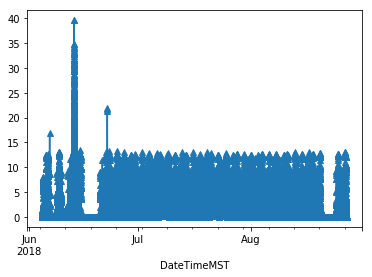

In [5]:
#print(highfreqdf)

highfreqdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')
plt.show()

In [14]:
print('\nNumber of All Readings is     ' + str(len(highfreqdf)))
print('Number of NonZero Readings is ' + str(np.count_nonzero(highfreqdf['Q_gpm']!=0)))
print('Number of Zero Readings is    ' + str(np.count_nonzero(highfreqdf['Q_gpm']==0)))

# Find Global Maximum
highfreq_max_value = max(highfreqdf['Q_gpm'])
highfreq_max_date = highfreqdf.index[highfreqdf['Q_gpm']==highfreq_max_value]
print ("\nHigh Frequency Maximum Flow is "+ str(round(highfreq_max_value,2)) 
       + ' gpm at time step ' +  str(highfreq_max_date[0]))

highfreq_min_value = min(highfreqdf['Q_gpm'])
print('High Frequency Minumum Flow is  ' + str(highfreq_min_value) + ' gpm')

# Find Average
highfreq_mean_value = np.mean(highfreqdf['Q_gpm'])
print ("High Frequency Average Flow is "+ str(round(highfreq_mean_value,2))+ ' gpm')

time=len(highfreqdf)*5/60 #min
print(time)
print('\nTotal Interval Is '+ str(round(time/60/24,2)) + ' days')
V=round(highfreq_mean_value*time,2)
print('Total Volume Passed Trough ' + str(round(time/60/24,2)) + ' days Is '+ str(V) + ' gallons')


Number of All Readings is     1449162
Number of NonZero Readings is 730085
Number of Zero Readings is    719077

High Frequency Maximum Flow is 39.63 gpm at time step 2018-06-13 07:47:00
High Frequency Minumum Flow is  0.0 gpm
High Frequency Average Flow is 0.68 gpm
120763.5

Total Interval Is 83.86 days
Total Volume Passed Trough 83.86 days Is 82548.99 gallons


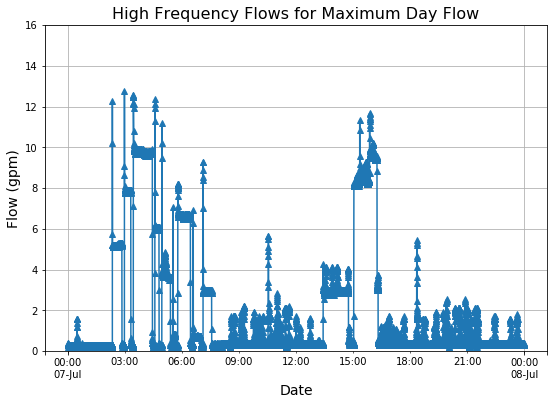

From 2018-07-07 00:00:00 to 2018-07-07 23:59:59

Mean Daily Flow is     1.96 gpm
Max High Freq Flow is 12.784 gpm
Min High Freq Flow is  0.213 gpm

This Day Has NO Zero Reading
Water Is Running All Time
Which May BE an Error in the Measurment Device OR a problem is the water faucets

Done!


In [8]:
# Jump to Maximum Daily Flow

# Define Sub data frame
beginDate = '2018-07-07 00:00:00'
endDate   = '2018-07-07 23:59:59'
maxday    = highfreqdf['Q_gpm'][beginDate:endDate]

#Convert Series Analysis to Dataframe
maxdaydf = pd.DataFrame(data=maxday, index=maxday.index)

#Set Time Step for Each Date
n=(maxdaydf.shape[0])
maxdaydf['ts'] =  np.arange(1,n+1)


# Plot
fig = plt.figure()
fig.set_size_inches(9, 6)

ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(0,16)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxdaydf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Plot tilte and Save Image
plt.title('High Frequency Flows for Maximum Day Flow', fontsize=16)
plt.savefig('High_Frequency_Flows_max_day')

plt.show()

print('From '+str(beginDate) + ' to '+ str(endDate))

mean = round(np.mean(maxday),3)
print('\nMean Daily Flow is     ' + str(mean) + ' gpm')
max_highfreq = round(max(maxday),3)
print('Max High Freq Flow is ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxday),3)
print('Min High Freq Flow is  ' + str(min_highfreq) + ' gpm')

print('\nThis Day Has NO Zero Reading')
print('Water Is Running All Time')
print('Which May BE an Error in the Measurment Device OR a problem is the water faucets')

print ('\nDone!')

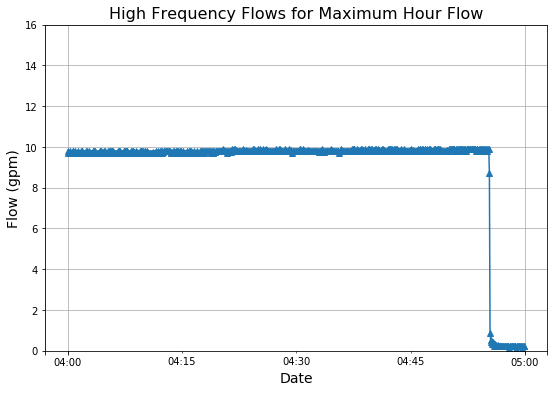

From 2018-06-30 04:00:00 to 2018-06-30 04:59:59
Mean Hourly Flow is   9.071 gpm
Max High Freq Flow is 9.907 gpm
Min High Freq Flow is 0.107 gpm

This Hour Has NO Zero Reading
Water Is Running All Time
Which May BE an Error in the Measurment Device OR a problem is the water faucets


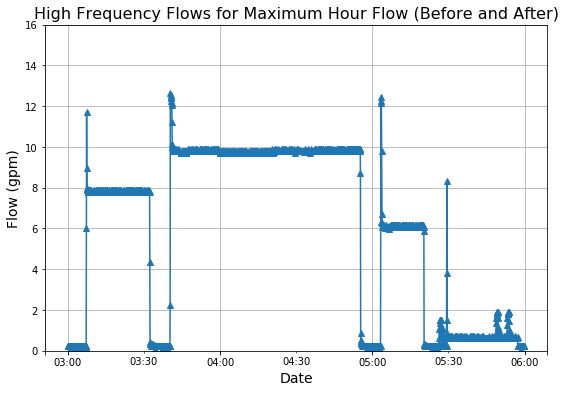

From 2018-06-30 03:00:00 to 2018-06-30 05:59:59
Max High Freq Flow is 12.624 gpm
Min High Freq Flow is 0.107 gpm

These 3 Hours Has NO Zero Reading
Water Is Running All Time
Which May BE an Error in the Measurment Device OR a problem is the water faucets

Done!


In [11]:
# Jump to Maximum Hourly Flow

# Define Sub data frame
beginDate = '2018-06-30 04:00:00'
endDate   = '2018-06-30 04:59:59'
maxhour   =  highfreqdf['Q_gpm'][beginDate:endDate]


#Convert Series Analysis to Dataframe
maxhourdf = pd.DataFrame(data=maxhour, index=maxhour.index)

#Set Time Step for Each Date
n=(maxhourdf.shape[0])
maxhourdf['ts'] =  np.arange(1,n+1)


# Plot
fig = plt.figure()
fig.set_size_inches(9, 6)

ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(0,16)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxhourdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Plot tilte and Save Image
plt.title('High Frequency Flows for Maximum Hour Flow', fontsize=16)
plt.savefig('High_Frequency_Flows_Max_Hour')

plt.show()

print('From '+str(beginDate) + ' to '+ str(endDate))

mean = round(np.mean(maxhour),3)
print('Mean Hourly Flow is   ' + str(mean) + ' gpm')
max_highfreq = round(max(maxhour),3)
print('Max High Freq Flow is ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxhour),3)
print('Min High Freq Flow is ' + str(min_highfreq) + ' gpm')

print('\nThis Hour Has NO Zero Reading')
print('Water Is Running All Time')
print('Which May BE an Error in the Measurment Device OR a problem is the water faucets')


# Define Sub data frame
beginDate = '2018-06-30 03:00:00'
endDate   = '2018-06-30 05:59:59'
maxhour   =  highfreqdf['Q_gpm'][beginDate:endDate]

#Convert Series Analysis to Dataframe
maxhourdf = pd.DataFrame(data=maxhour, index=maxhour.index)

#Set Time Step for Each Date
n=(maxhourdf.shape[0])
maxhourdf['ts'] =  np.arange(1,n+1)


# Plot
fig = plt.figure()
fig.set_size_inches(9, 6)

ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(0,16)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxhourdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Plot tilte and Save Image
plt.title('High Frequency Flows for Maximum Hour Flow (Before and After)', fontsize=16)
plt.savefig('High_Frequency_Flows_Max_Hour_B&A')

plt.show()

print('From '+str(beginDate) + ' to '+ str(endDate))

max_highfreq = round(max(maxhour),3)
print('Max High Freq Flow is ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxhour),3)
print('Min High Freq Flow is ' + str(min_highfreq) + ' gpm')

print('\nThese 3 Hours Has NO Zero Reading')
print('Water Is Running All Time')
print('Which May BE an Error in the Measurment Device OR a problem is the water faucets')


print ('\nDone!')

From 2018-06-13 07:30:00 to 2018-06-13 08:59:59
Total Interval Is 90.0 min


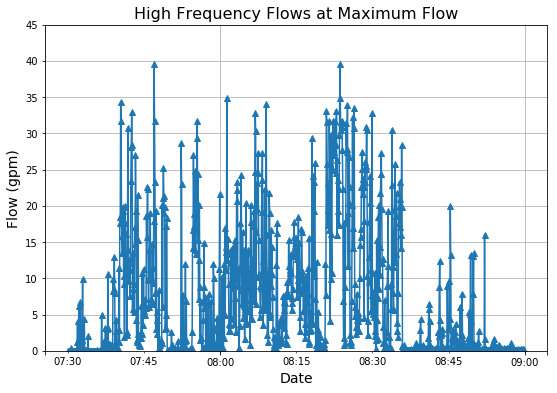

Mean High Freq Flow is 6.89 gpm
Max High Freq Flow is  39.629 gpm
Min High Freq Flow is  0.0 gpm

Total Volume Passed Trough 90.0 min Is 620.1 g

This Hour Has NO Zero Reading
Water Is Running All Time
Which May BE an Error in the Measurment Device OR a problem is the water faucets


In [27]:
# Jump to Maximum High Frequency Flow

# Define Sub data frame
beginDate = '2018-06-13 07:30:00'
endDate   = '2018-06-13 08:59:59'
maxflow   =  highfreqdf['Q_gpm'][beginDate:endDate]

print('From '+str(beginDate) + ' to '+ str(endDate))
time=len(maxflowdf)*5/60 #min
print('Total Interval Is '+str(time) + ' min')

#Convert Series Analysis to Dataframe
maxflowdf = pd.DataFrame(data=maxflow, index=maxflow.index)

#Set Time Step for Each Date
n=(maxflowdf.shape[0])
maxflowdf['ts'] =  np.arange(1,n+1)

# Plot
fig = plt.figure()
fig.set_size_inches(9, 6)

ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(0,45)
ax.set_ylabel('Flow (gpm)', fontsize=14)

maxflowdf['Q_gpm'].plot(kind='line', use_index=True, style='-', marker='^', label='Max')

ax.set_xlabel('Date', fontsize=14)
ax.grid(True)

# Plot tilte and Save Image
plt.title('High Frequency Flows at Maximum Flow', fontsize=16)
plt.savefig('High_Frequency_Flows_Max_Flow')

plt.show()



mean_highfreq = round(np.mean(maxflow),3)
print('Mean High Freq Flow is ' + str(mean_highfreq) + ' gpm')
max_highfreq = round(max(maxflow),3)
print('Max High Freq Flow is  ' + str(max_highfreq) + ' gpm')
min_highfreq = round(min(maxflow),3)
print('Min High Freq Flow is  ' + str(min_highfreq) + ' gpm')

V=mean_highfreq*time
print('\nTotal Volume Passed Trough ' + str(time) + ' min Is '+ str(V) + ' gallons')

print('\nThis Volume Is Nearly Impossible In Normal Water Usage')

In [15]:
# SUMMARY OF PREVIOUS ANALYSIS

# String concatenation is done with the "+" operator
print ("\nGlobal Maximum is "+ str(round(max_week_value,2)) + ' gpm at the end of week ' +  str(max_week_date[0]))
print ('\nMaximum Daily Flow was ' + str(round(max_day,2)) + ' gpm at the end of day ' +  str(ts_max_day[0]))
print ('\nMaximum Hourly Flow was ' + str(round(max_hour,2)) + ' gpm at the end of hour ' +  str(ts_max_hour[0]))

#print ('The begin date is ' + str(df.index.min()))
#print ('The end date is ' + str(df.index.max()))

# \n for adding empty line



Global Maximum is 1.03 gpm at the end of week 2018-07-08 00:00:00

Maximum Daily Flow was 1.96 gpm at the end of day 2018-07-07 00:00:00

Maximum Hourly Flow was 9.07 gpm at the end of hour 2018-06-30 04:00:00
